Anna D'Angela | Return to [GitHub](https://github.com/anna-dang/music).

# Playlist Analysis - WIP
**Toy project to play with Spotify and Genius APIs**

## TODO
- connect spotify API
- gather song data, build df
- plot song features as radar plot
- connect to genius API
- get song lyrics, add to df
- sentiment analysis of song lyrics, add score to df
- plot sentiment/build metric for overall playlist

In [80]:
import json
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lyricsgenius as lg

import spotipy as sp
from spotipy.oauth2 import SpotifyClientCredentials

from sklearn.preprocessing import MinMaxScaler

### i. Connect Spotify API, retrieve playlist details

In [9]:
# Set API credentials
with open("/Users/annadangela/Documents/Shh/spotify_token.json") as f:
    d = json.load(f)
    client_id = d['id']
    client_secret = d['secret']

In [10]:
# Create a variable that handles requests, set client
handler = SpotifyClientCredentials(client_id, client_secret)
sc = sp.Spotify(client_credentials_manager = handler)

In [11]:
# Select playlist to analyze
playlist_id = input('Past Spotify Playist URI:')
print('Selected URI:', playlist_id)

# test on : spotify:playlist:7MEqMmwJ35o0Ugg5Bm7Gup

Past Spotify Playist URI:spotify:playlist:7MEqMmwJ35o0Ugg5Bm7Gup
Selected URI: spotify:playlist:7MEqMmwJ35o0Ugg5Bm7Gup


In [13]:
# Get playlist info through API client
results = sc.playlist(playlist_id)

In [15]:
# Preview JSON results
results

{'collaborative': False,
 'description': 'I have all night',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/7MEqMmwJ35o0Ugg5Bm7Gup'},
 'followers': {'href': None, 'total': 2},
 'href': 'https://api.spotify.com/v1/playlists/7MEqMmwJ35o0Ugg5Bm7Gup?additional_types=track',
 'id': '7MEqMmwJ35o0Ugg5Bm7Gup',
 'images': [{'height': 640,
   'url': 'https://mosaic.scdn.co/640/ab67616d0000b2730627989b9c103e2bcdaac778ab67616d0000b27347730df133b8f5d411460c66ab67616d0000b2734bdfdb314461d56e3576584dab67616d0000b2739d899e2ff603f30ace1159a5',
   'width': 640},
  {'height': 300,
   'url': 'https://mosaic.scdn.co/300/ab67616d0000b2730627989b9c103e2bcdaac778ab67616d0000b27347730df133b8f5d411460c66ab67616d0000b2734bdfdb314461d56e3576584dab67616d0000b2739d899e2ff603f30ace1159a5',
   'width': 300},
  {'height': 60,
   'url': 'https://mosaic.scdn.co/60/ab67616d0000b2730627989b9c103e2bcdaac778ab67616d0000b27347730df133b8f5d411460c66ab67616d0000b2734bdfdb314461d56e3576584dab67616d0000b2739d89

In [34]:
# Get song IDs from results
title = results['description']
songs = [i['track']['id'] for i in results['tracks']['items']]
print(f"'{title}', {len(songs)} songs")
songs[:5]

'I have all night', 48 songs


['1QXiYUBKaibKVHEbxBeu1f',
 '0f3HpUeCzPHnOYKu0mPhjJ',
 '4e1TDCaLkn77JOgghYb11y',
 '0mpvvju4F87swOqaC3pjAU',
 '5gCGQlfEofp2Zxz5ZjJAa9']

### ii. Build playlist DF

In [46]:
# TODO tidy up, not mine

song_meta = {'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_id in songs:
    # get song's meta data
    meta = sc.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)

    # album name
    album = meta['album']['name']
    song_meta['album'] += [album]

    # song name
    song = meta['name']
    song_meta['name'] += [song]
    
    # artists name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist'] += [artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit = meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity = meta['popularity']
    song_meta['popularity'].append(popularity)

song_meta_df = pd.DataFrame.from_dict(song_meta)
song_meta_df.head()

,id,album,name,artist,explicit,popularity
0,1QXiYUBKaibKVHEbxBeu1f,Veil of Counsel,Ecco,Public Memory,False,48
1,0f3HpUeCzPHnOYKu0mPhjJ,Evigt Fiskande,Evigt Fiskande - Original Mix,PANG!,False,36
2,4e1TDCaLkn77JOgghYb11y,Solar,Swan Dive,Maceo Plex,False,34
3,0mpvvju4F87swOqaC3pjAU,Solar,Polygon Pulse,"Maceo Plex, DNCN",False,33
4,5gCGQlfEofp2Zxz5ZjJAa9,W:/2016ALBUM/,Let Go,"deadmau5, Grabbitz",False,49
5,5f4Y1zAYIinYJV5TlZgKLt,Rise,Hot As You Want,"Lane 8, Solomon Grey",False,43
6,7IctzNEJucIBzkAWYg6np2,The Chain,The Chain,Kerala Dust,False,52
7,6G0mR7TmmHf5Tqi9CNZik3,Fliederregen / Reflection,Reflection,"Ben Böhmer, Wood, Margret",False,43
8,17Symm7sFoj7fEqMh8brzD,Quartz,Sugar on my Tongue,Fly Golden Eagle,False,0
9,6ZIT7Isugjflmm3TDIkgji,Ride in the city,So Hot - Original Mix,Funky Fat,False,27


In [41]:
# look up song features by track id
features = sc.audio_features(songs)
features

[{'danceability': 0.589,
  'energy': 0.38,
  'key': 9,
  'loudness': -9.833,
  'mode': 0,
  'speechiness': 0.0272,
  'acousticness': 0.0802,
  'instrumentalness': 0.9,
  'liveness': 0.344,
  'valence': 0.18,
  'tempo': 89.982,
  'type': 'audio_features',
  'id': '1QXiYUBKaibKVHEbxBeu1f',
  'uri': 'spotify:track:1QXiYUBKaibKVHEbxBeu1f',
  'track_href': 'https://api.spotify.com/v1/tracks/1QXiYUBKaibKVHEbxBeu1f',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1QXiYUBKaibKVHEbxBeu1f',
  'duration_ms': 318434,
  'time_signature': 4},
 {'danceability': 0.729,
  'energy': 0.705,
  'key': 7,
  'loudness': -10.458,
  'mode': 0,
  'speechiness': 0.0294,
  'acousticness': 0.111,
  'instrumentalness': 0.703,
  'liveness': 0.0778,
  'valence': 0.101,
  'tempo': 121.986,
  'type': 'audio_features',
  'id': '0f3HpUeCzPHnOYKu0mPhjJ',
  'uri': 'spotify:track:0f3HpUeCzPHnOYKu0mPhjJ',
  'track_href': 'https://api.spotify.com/v1/tracks/0f3HpUeCzPHnOYKu0mPhjJ',
  'analysis_url': 'https://api.

In [44]:
features_df = pd.DataFrame.from_dict(features)
features_df['duration_min']=features_df['duration_ms']/60000
features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,duration_min
0,0.589,0.380,9,-9.833,0,0.0272,0.08020,0.900,0.3440,0.1800,89.982,audio_features,1QXiYUBKaibKVHEbxBeu1f,spotify:track:1QXiYUBKaibKVHEbxBeu1f,https://api.spotify.com/v1/tracks/1QXiYUBKaibK...,https://api.spotify.com/v1/audio-analysis/1QXi...,318434,4,5.307233
1,0.729,0.705,7,-10.458,0,0.0294,0.11100,0.703,0.0778,0.1010,121.986,audio_features,0f3HpUeCzPHnOYKu0mPhjJ,spotify:track:0f3HpUeCzPHnOYKu0mPhjJ,https://api.spotify.com/v1/tracks/0f3HpUeCzPHn...,https://api.spotify.com/v1/audio-analysis/0f3H...,480015,3,8.000250
2,0.716,0.554,6,-11.365,1,0.0345,0.00963,0.789,0.0450,0.1120,110.010,audio_features,4e1TDCaLkn77JOgghYb11y,spotify:track:4e1TDCaLkn77JOgghYb11y,https://api.spotify.com/v1/tracks/4e1TDCaLkn77...,https://api.spotify.com/v1/audio-analysis/4e1T...,555059,4,9.250983
3,0.706,0.638,4,-8.370,0,0.0312,0.23900,0.695,0.0951,0.4960,126.987,audio_features,0mpvvju4F87swOqaC3pjAU,spotify:track:0mpvvju4F87swOqaC3pjAU,https://api.spotify.com/v1/tracks/0mpvvju4F87s...,https://api.spotify.com/v1/audio-analysis/0mpv...,400791,4,6.679850
4,0.644,0.555,0,-10.981,0,0.0429,0.20500,0.309,0.1200,0.0345,128.026,audio_features,5gCGQlfEofp2Zxz5ZjJAa9,spotify:track:5gCGQlfEofp2Zxz5ZjJAa9,https://api.spotify.com/v1/tracks/5gCGQlfEofp2...,https://api.spotify.com/v1/audio-analysis/5gCG...,378450,3,6.307500


In [47]:
# build out df
final_df = song_meta_df.merge(features_df, on = 'id')
final_df 

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,duration_min
0,1QXiYUBKaibKVHEbxBeu1f,Veil of Counsel,Ecco,Public Memory,False,48,0.589,0.380,9,-9.833,...,0.3440,0.1800,89.982,audio_features,spotify:track:1QXiYUBKaibKVHEbxBeu1f,https://api.spotify.com/v1/tracks/1QXiYUBKaibK...,https://api.spotify.com/v1/audio-analysis/1QXi...,318434,4,5.307233
1,0f3HpUeCzPHnOYKu0mPhjJ,Evigt Fiskande,Evigt Fiskande - Original Mix,PANG!,False,36,0.729,0.705,7,-10.458,...,0.0778,0.1010,121.986,audio_features,spotify:track:0f3HpUeCzPHnOYKu0mPhjJ,https://api.spotify.com/v1/tracks/0f3HpUeCzPHn...,https://api.spotify.com/v1/audio-analysis/0f3H...,480015,3,8.000250
2,4e1TDCaLkn77JOgghYb11y,Solar,Swan Dive,Maceo Plex,False,34,0.716,0.554,6,-11.365,...,0.0450,0.1120,110.010,audio_features,spotify:track:4e1TDCaLkn77JOgghYb11y,https://api.spotify.com/v1/tracks/4e1TDCaLkn77...,https://api.spotify.com/v1/audio-analysis/4e1T...,555059,4,9.250983
3,0mpvvju4F87swOqaC3pjAU,Solar,Polygon Pulse,"Maceo Plex, DNCN",False,33,0.706,0.638,4,-8.370,...,0.0951,0.4960,126.987,audio_features,spotify:track:0mpvvju4F87swOqaC3pjAU,https://api.spotify.com/v1/tracks/0mpvvju4F87s...,https://api.spotify.com/v1/audio-analysis/0mpv...,400791,4,6.679850
4,5gCGQlfEofp2Zxz5ZjJAa9,W:/2016ALBUM/,Let Go,"deadmau5, Grabbitz",False,49,0.644,0.555,0,-10.981,...,0.1200,0.0345,128.026,audio_features,spotify:track:5gCGQlfEofp2Zxz5ZjJAa9,https://api.spotify.com/v1/tracks/5gCGQlfEofp2...,https://api.spotify.com/v1/audio-analysis/5gCG...,378450,3,6.307500
5,5f4Y1zAYIinYJV5TlZgKLt,Rise,Hot As You Want,"Lane 8, Solomon Grey",False,43,0.625,0.599,8,-7.997,...,0.2950,0.2340,125.019,audio_features,spotify:track:5f4Y1zAYIinYJV5TlZgKLt,https://api.spotify.com/v1/tracks/5f4Y1zAYIinY...,https://api.spotify.com/v1/audio-analysis/5f4Y...,286690,4,4.778167
6,7IctzNEJucIBzkAWYg6np2,The Chain,The Chain,Kerala Dust,False,52,0.682,0.492,9,-13.151,...,0.1070,0.3980,151.016,audio_features,spotify:track:7IctzNEJucIBzkAWYg6np2,https://api.spotify.com/v1/tracks/7IctzNEJucIB...,https://api.spotify.com/v1/audio-analysis/7Ict...,321763,4,5.362717
7,6G0mR7TmmHf5Tqi9CNZik3,Fliederregen / Reflection,Reflection,"Ben Böhmer, Wood, Margret",False,43,0.756,0.517,1,-8.923,...,0.1200,0.3330,123.005,audio_features,spotify:track:6G0mR7TmmHf5Tqi9CNZik3,https://api.spotify.com/v1/tracks/6G0mR7TmmHf5...,https://api.spotify.com/v1/audio-analysis/6G0m...,300860,4,5.014333
8,17Symm7sFoj7fEqMh8brzD,Quartz,Sugar on my Tongue,Fly Golden Eagle,False,0,0.431,0.574,6,-8.968,...,0.5620,0.5110,97.557,audio_features,spotify:track:17Symm7sFoj7fEqMh8brzD,https://api.spotify.com/v1/tracks/17Symm7sFoj7...,https://api.spotify.com/v1/audio-analysis/17Sy...,340600,4,5.676667
9,6ZIT7Isugjflmm3TDIkgji,Ride in the city,So Hot - Original Mix,Funky Fat,False,27,0.920,0.406,0,-11.738,...,0.0685,0.5590,120.088,audio_features,spotify:track:6ZIT7Isugjflmm3TDIkgji,https://api.spotify.com/v1/tracks/6ZIT7Isugjfl...,https://api.spotify.com/v1/audio-analysis/6ZIT...,404548,4,6.742467


### iii. Plot Radar graph

In [67]:
radar_feats = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
radar_df = final_df[radar_feats]
radar_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.589,0.380,9,-9.833,0,0.0272,0.08020,0.900,0.3440,0.1800,89.982
1,0.729,0.705,7,-10.458,0,0.0294,0.11100,0.703,0.0778,0.1010,121.986
2,0.716,0.554,6,-11.365,1,0.0345,0.00963,0.789,0.0450,0.1120,110.010
3,0.706,0.638,4,-8.370,0,0.0312,0.23900,0.695,0.0951,0.4960,126.987
4,0.644,0.555,0,-10.981,0,0.0429,0.20500,0.309,0.1200,0.0345,128.026


In [68]:
# Set all to same scale
min_max_scaler = MinMaxScaler()
radar_df.loc[:] = min_max_scaler.fit_transform(radar_df.loc[:])
radar_df.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.421329,0.102655,0.818182,0.447011,0.0,0.022388,0.107425,0.965665,0.532028,0.181083,0.132511
1,0.666084,0.677876,0.636364,0.389714,0.0,0.042910,0.148903,0.754292,0.058363,0.082763,0.415557
2,0.643357,0.410619,0.545455,0.306564,1.0,0.090485,0.012391,0.846567,0.000000,0.096453,0.309640
3,0.625874,0.559292,0.363636,0.581133,0.0,0.059701,0.321277,0.745708,0.089146,0.574362,0.459786
4,0.517483,0.412389,0.000000,0.341768,0.0,0.168843,0.275490,0.331545,0.133452,0.000000,0.468975


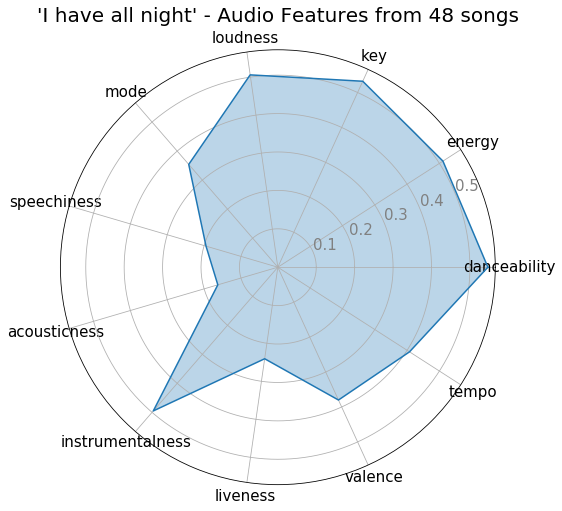

In [77]:
# TODO not mine

# number of categories
N = len(radar_feats)
value = list(radar_df.mean())

# repeat first value to close the circle
value += value[:1]

# calculate angle for each category
angles = [ n/float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# plot radar
fig=plt.figure(figsize=(12,8))
plt.polar(angles, value)
plt.fill(angles, value, alpha=0.3)

plt.title(f"'{title}' - Audio Features from {len(songs)} songs", size=20)
plt.xticks(angles[:-1], radar_feats, size=15)
plt.yticks(color='grey',size=15)
plt.show()

### iiii. Connect to Genius API, add lyrics to DF

In [81]:
# impliment credentials for accessing API
with open("/Users/annadangela/Documents/Shh/genius_api.json") as f:
    d = json.load(f)
    token = d['token']
    
gpA = lg.Genius(token)

In [88]:
# create a function for requesting artists
def gpArtist(artist_name,song_amount):
    artist = gpA.search_artist(artist_name, max_songs = song_amount,
                                    sort = "title")
    return artist.songs
# create function for requesting songs
def get_lyrics(song_name, artist_name):
    lyrics = gpA.search_song(song_name, artist_name).lyrics
    return lyrics

In [86]:
lyrics = gpA.search_song(final_df.iloc[0]['name'], final_df.iloc[0]['artist']).lyrics
print(lyrics)

Searching for "Ecco" by Public Memory...
Done.
When I finish with the lion's share
I will go down another road
Admit it with a tiny head
You and them found some oath

Man looking for his only way
Though it's soon impossible
Bat looming when an angel go home
Bout as good as anyone

So moving like a phoneme trial
It concerns a ghost from home
(now) that you have really found your place
Would you say you were the one

Now reeling with a played oath for her
To deserve this lash of hope
Now we were always back on play
Who deserves the world alone

No meter synchs the days
Of all that's staged
To let your color run

Some blowing tattered rags
It reigns you in
Painted in my mind


In [92]:
# To do : try/except if no lyric found

def get_lyrics1(song_name, artist_name):
    try:
        lyrics = gpA.search_song(song_name, artist_name).lyrics
    except:
        lyrics = 'Not Found'
    return lyrics

final_df['lyrics'] = final_df.apply(lambda x: get_lyrics1(x['name'], x['artist']).lyrics, axis=1)
final_df['lyrics']

Searching for "Ecco" by Public Memory...
Done.
Searching for "Ecco" by Public Memory...
Done.


AttributeError: ("'str' object has no attribute 'lyrics'", 'occurred at index 0')

In [ ]:
# for i, song in final_df.iterrows():
#     song_name = song[0]
#     song_lyrics = gpSong(song[0],song[1]).lyrics
    
    
#     sentiment = analyzer.polarity_scores(song_lyrics)
#     iSong = billDF.index[billDF['Song Title'] == song_name].tolist()[0]b